## Internship Capstone Project - Customer Analysis

OVERVIEW:
A well known company with numerous products needs to analyze their customer behavior and classify them whether they will accept the campaigns held by the company. Also, cluster the customers into different segments.

Models are created using train and test dataset's provided

GOALS:
The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it using Test dataset.

![Image Alt Text](Customer-Analysis.png)

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

### Loading dataset 

In [2]:
data = pd.read_excel("C://Users//navs9//Downloads//market_train.xlsx")
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status   
0                0           0  5524        1957        S1         Lajang  \
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth   
0     58138000.0        0         0  2012-09-04  ...                  7  \
1     46344000.0        1         1  2014-03-08  ...                  5   
2     71613000.0        0         0  2013-08-21  ...                  4   
3     26646000.0        1         0  2014-02-10  ...                  6   
4     58293000.0        1         0  2014-01-19  ...                  5   
...          ...      ...       ...         ...  ...                ...   
1675  20193000.0        0         0  2012-11-28  ...                  4   
1676  27573000.0        1         0  2013-03-25  ...                  8   
1677  15862000.0        1         0  2013-06-27  ...                  8   
1678  49544000.0        1         0  2013-02-12  ...                  7   
1679  33228000.0        1         0  2014-01-23  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0                0             0             0             0             0  \
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1675             0             0             0             0             0   
1676             0             0             0             0             0   
1677             0             0             0             0             0   
1678             0             0             0             0             0   
1679             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
1675         0              3         11         0  
1676         0              3         11         0  
1677         0              3         11         0  
1678         0              3         11         0  
1679         0              3         11         0  

[1680 rows x 31 columns]

In [3]:
print("Number of datapoints:", len(data))

Number of datapoints: 1680


In [4]:
#loading test dataset
test = pd.read_excel("C://Users//navs9//Downloads//market_test.xlsx")
test

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth Education Marital_Status   
0            1681        1681   5939        1971        S1    Bertunangan  \
1            1682        1682   2156        1955        S3        Menikah   
2            1683        1683   7788        1983        S3        Menikah   
3            1684        1684  10323        1952        S1        Menikah   
4            1685        1685   7947        1969        S1        Menikah   
..            ...         ...    ...         ...       ...            ...   
554          2235        2235  10870        1967        S1        Menikah   
555          2236        2236   4001        1946        S3    Bertunangan   
556          2237        2237   7270        1981        S1          Cerai   
557          2238        2238   8235        1956        S2    Bertunangan   
558          2239        2239   9405        1954        S3        Menikah   

         Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth   
0    38232000.0        1         1  2014-01-17  ...                  5  \
1    22554000.0        1         1  2012-11-03  ...                  5   
2    23536000.0        1         0  2014-06-04  ...                  3   
3    49413000.0        0         1  2013-10-25  ...                  5   
4    42231000.0        1         1  2014-03-25  ...                  5   
..          ...      ...       ...         ...  ...                ...   
554  61223000.0        0         1  2013-06-13  ...                  5   
555  64014000.0        2         1  2014-06-10  ...                  7   
556  56981000.0        0         0  2014-01-25  ...                  6   
557  69245000.0        0         1  2014-01-24  ...                  3   
558  52869000.0        1         1  2012-10-15  ...                  7   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0               0             0             0             0             0  \
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
554             0             0             0             0             0   
555             0             0             0             1             0   
556             0             1             0             0             0   
557             0             0             0             0             0   
558             0             0             0             0             0   

     Complain  Z_CostContact  Z_Revenue  Response  
0           0              3         11         0  
1           0              3         11         0  
2           0              3         11         0  
3           0              3         11         0  
4           0              3         11         0  
..        ...            ...        ...       ...  
554         0              3         11         0  
555         0              3         11         0  
556         0              3         11         0  
557         0              3         11         0  
558         0              3         11         1  

[559 rows x 31 columns]

In [5]:
print("Number of test datapoints:", len(test))

Number of test datapoints: 559


### Details of train dataset 

The dataset consists of 1680 rows and 31 attributes. It can be classified in to four categories, which are People information,
Products information, Promotion information and Place information.

People information consists of following details:

● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise
****



Products information consists of following details:

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years
****



Promotion information consists of following details:

● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
****



Place information consists of following details:

● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalogue

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to company’s website in the last month
****

### Data cleaning and exploration

In [6]:
#Information of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0.1         1680 non-null   int64         
 1   Unnamed: 0           1680 non-null   int64         
 2   ID                   1680 non-null   int64         
 3   Year_Birth           1680 non-null   int64         
 4   Education            1680 non-null   object        
 5   Marital_Status       1680 non-null   object        
 6   Income               1663 non-null   float64       
 7   Kidhome              1680 non-null   int64         
 8   Teenhome             1680 non-null   int64         
 9   Dt_Customer          1680 non-null   datetime64[ns]
 10  Recency              1680 non-null   int64         
 11  MntCoke              1680 non-null   int64         
 12  MntFruits            1680 non-null   int64         
 13  MntMeatProducts      1680 non-nul

In [7]:
#Information of the train dataset 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0.1         559 non-null    int64         
 1   Unnamed: 0           559 non-null    int64         
 2   ID                   559 non-null    int64         
 3   Year_Birth           559 non-null    int64         
 4   Education            559 non-null    object        
 5   Marital_Status       559 non-null    object        
 6   Income               552 non-null    float64       
 7   Kidhome              559 non-null    int64         
 8   Teenhome             559 non-null    int64         
 9   Dt_Customer          559 non-null    datetime64[ns]
 10  Recency              559 non-null    int64         
 11  MntCoke              559 non-null    int64         
 12  MntFruits            559 non-null    int64         
 13  MntMeatProducts      559 non-null  

#### About the information regarding data
The data type of majority of columns are numerical values. There are categorical values in Education and Marital_Status columns.
Categorical values can be converted to numerical values later using encoding. The Education and Marital_Status columns are also having their values given in some another language. That will be also found and replaced by values corresponding in English langauage. 

Dt_Customer column consists of value in date format.

Also there are some missing values or null values in Income column. The null value count in each column is verified again in next step. The null values present in the rows will be replaced by any measures of central tendecny. For that I will find outliers and measures of central tendency.

In [8]:
#finding null values
data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#income column is having seventeen null values.
#using measures of central tendency to replace the null values using suitable values.
#describing the dataset
data.describe()

Unnamed: 0.1   Unnamed: 0            ID   Year_Birth        Income   
count   1680.000000  1680.000000   1680.000000  1680.000000  1.663000e+03  \
mean     839.500000   839.500000   5551.728571  1968.847619  5.201434e+07   
min        0.000000     0.000000      0.000000  1893.000000  1.730000e+06   
25%      419.750000   419.750000   2823.250000  1960.000000  3.568800e+07   
50%      839.500000   839.500000   5381.000000  1970.000000  5.125000e+07   
75%     1259.250000  1259.250000   8370.750000  1977.000000  6.812200e+07   
max     1679.000000  1679.000000  11191.000000  1996.000000  1.623970e+08   
std      485.118542   485.118542   3238.155703    12.027192  2.148248e+07   

           Kidhome     Teenhome                    Dt_Customer      Recency   
count  1680.000000  1680.000000                           1680  1680.000000  \
mean      0.452381     0.500000  2013-07-11 04:42:51.428571392    49.083333   
min       0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%       0.000000     0.000000            2013-01-17 00:00:00    24.000000   
50%       0.000000     0.000000            2013-07-11 00:00:00    50.000000   
75%       1.000000     1.000000            2013-12-29 00:00:00    74.000000   
max       2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std       0.546901     0.550055                            NaN    28.930637   

            MntCoke  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count  1.680000e+03  ...        1680.000000   1680.000000   1680.000000  \
mean   3.048994e+05  ...           5.332143      0.071429      0.074405   
min    0.000000e+00  ...           0.000000      0.000000      0.000000   
25%    2.400000e+04  ...           3.000000      0.000000      0.000000   
50%    1.730000e+05  ...           6.000000      0.000000      0.000000   
75%    4.942500e+05  ...           7.000000      0.000000      0.000000   
max    1.492000e+06  ...          20.000000      1.000000      1.000000   
std    3.387051e+05  ...           2.449814      0.257616      0.262507   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact   
count   1680.000000   1680.000000   1680.000000  1680.000000         1680.0  \
mean       0.069048      0.062500      0.011905     0.010119            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.253611      0.242134      0.108490     0.100113            0.0   

       Z_Revenue     Response  
count     1680.0  1680.000000  
mean        11.0     0.144048  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.351243  

[8 rows x 29 columns]

In [10]:
#mean value of income column
data.Income.mean()

52014343.35538184

In [11]:
#median value of income column
data.Income.median()

51250000.0

In [12]:
#finding outliers in Income column if there is any and cross checking with values of above central tendency measures.
a=data['Income'].quantile(0.25)
b=data['Income'].quantile(0.75)
iqr = b - a
iqr_lower_bound = a - (1.5 * iqr)
iqr_upper_bound = b + (1.5 * iqr)
data_2=data[(data['Income']<iqr_upper_bound)&(data['Income']>iqr_lower_bound)]
#data_2 is new data frame after removing outliers
data_2.describe()

Unnamed: 0.1   Unnamed: 0            ID   Year_Birth        Income   
count   1657.000000  1657.000000   1657.000000  1657.000000  1.657000e+03  \
mean     843.893784   843.893784   5551.152686  1968.824381  5.162982e+07   
min        0.000000     0.000000      0.000000  1893.000000  1.730000e+06   
25%      428.000000   428.000000   2815.000000  1960.000000  3.568400e+07   
50%      845.000000   845.000000   5386.000000  1970.000000  5.112400e+07   
75%     1259.000000  1259.000000   8370.000000  1977.000000  6.789300e+07   
max     1679.000000  1679.000000  11191.000000  1996.000000  1.054710e+08   
std      482.446556   482.446556   3242.085217    12.050315  2.054593e+07   

           Kidhome     Teenhome                    Dt_Customer      Recency   
count  1657.000000  1657.000000                           1657  1657.000000  \
mean      0.449608     0.499698  2013-07-11 02:17:18.503319296    49.069403   
min       0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%       0.000000     0.000000            2013-01-17 00:00:00    24.000000   
50%       0.000000     0.000000            2013-07-11 00:00:00    50.000000   
75%       1.000000     1.000000            2013-12-29 00:00:00    74.000000   
max       2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std       0.545094     0.549621                            NaN    28.904171   

            MntCoke  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count  1.657000e+03  ...        1657.000000    1657.00000   1657.000000  \
mean   3.070338e+05  ...           5.349427       0.07242      0.074231   
min    0.000000e+00  ...           0.000000       0.00000      0.000000   
25%    2.400000e+04  ...           3.000000       0.00000      0.000000   
50%    1.770000e+05  ...           6.000000       0.00000      0.000000   
75%    5.040000e+05  ...           7.000000       0.00000      0.000000   
max    1.492000e+06  ...          20.000000       1.00000      1.000000   
std    3.394535e+05  ...           2.437960       0.25926      0.262225   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact   
count   1657.000000   1657.000000   1657.000000  1657.000000         1657.0  \
mean       0.070006      0.062161      0.012070     0.010260            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.255234      0.241520      0.109232     0.100799            0.0   

       Z_Revenue     Response  
count     1657.0  1657.000000  
mean        11.0     0.146047  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.353260  

[8 rows x 29 columns]

In [13]:
#mean value of income column in new data frame
#previous mean was 52014343.35538184
data_2.Income.mean()

51629817.139408566

In [14]:
#median value of income column in new data frame
#previous median was 51250000.0
data_2.Income.median()

51124000.0

In [15]:
#finding skewness in this dataset for income column to choose whether mean or median is good to replace the values

#Calculating skewness
from scipy.stats import skew
skewness = skew(data_2.Income)
print("Skewness of data =",skewness)

#Determining the best measure of central tendency
if abs(skewness) < 0.5:
    print("The data is approximately normally distributed. Both mean and median are reasonable choices.")
elif skewness > 0.5:
    print("The data is positively skewed. Use the median as a better measure of central tendency.")
else:
    print("The data is negatively skewed. Use the median as a better measure of central tendency.")

Skewness of data = 0.01245494649650247
The data is approximately normally distributed. Both mean and median are reasonable choices.


In [16]:
#so choosing the median value to replace the null values in original dataset
#median = 51124000.0
#replacing null values of Income column with median value as shown below in original dataset
data['Income'].fillna(51124000.0, inplace=True)

In [17]:
#checking null values once again
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [25]:
#the null values of income column is replaced by median value

In [18]:
#finding unique values in categorical columns
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Menikah        650
Bertunangan    438
Lajang         360
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
S1     834
S3     373
S2     279
D3     159
SMA     35
Name: count, dtype: int64


In [19]:
#in marital status column the unique values are mentioned in Indonesian language, converting them to English words
#similarly in education column also unique values is not clearly describing the educational status. So replacing them also
#replacing values in education column
data["Education"]=data["Education"].replace({"S1":"Graduated", "S2":"Post-Graduation", "S3":"PhD", "D3":"Diploma", "SMA":"Matriculation"})

In [20]:
#replacing values in Marital_Status column
data["Marital_Status"]=data["Marital_Status"].replace({"Menikah":"Married", "Bertunangan":"Engaged", "Lajang":"Single", "Janda":"Widow", "Cerai":"Divorced", "Duda":"Alone"})

In [21]:
#replacing values in education column in test data
test["Education"]=test["Education"].replace({"S1":"Graduated", "S2":"Post-Graduation", "S3":"PhD", "D3":"Diploma", "SMA":"Matriculation"})

In [22]:
#replacing values in Marital_Status column in test data
test["Marital_Status"]=test["Marital_Status"].replace({"Menikah":"Married", "Bertunangan":"Engaged", "Lajang":"Single", "Janda":"Widow", "Cerai":"Divorced", "Duda":"Alone"})

In [23]:
#checking the updated data
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   
0                     7             0             0             0  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
1675                  4             0             0             0   
1676                  8             0             0             0   
1677                  8             0             0             0   
1678                  7             0             0             0   
1679                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0                0             0         0              3         11         1  
1                0             0         0              3         11         0  
2                0             0         0              3         11         0  
3                0             0         0              3         11         0  
4                0             0         0              3         11         0  
...            ...           ...       ...            ...        ...       ...  
1675             0             0         0              3         11         0  
1676             0             0         0              3         11         0  
1677             0             0         0              3         11         0  
1678             0             0         0              3         11         0  
1679             0             0         0              3         11         0  

[1680 rows x 31 columns]

In [24]:
#checking the updated test data
test

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth        Education   
0            1681        1681   5939        1971        Graduated  \
1            1682        1682   2156        1955              PhD   
2            1683        1683   7788        1983              PhD   
3            1684        1684  10323        1952        Graduated   
4            1685        1685   7947        1969        Graduated   
..            ...         ...    ...         ...              ...   
554          2235        2235  10870        1967        Graduated   
555          2236        2236   4001        1946              PhD   
556          2237        2237   7270        1981        Graduated   
557          2238        2238   8235        1956  Post-Graduation   
558          2239        2239   9405        1954              PhD   

    Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0          Engaged  38232000.0        1         1  2014-01-17  ...  \
1          Married  22554000.0        1         1  2012-11-03  ...   
2          Married  23536000.0        1         0  2014-06-04  ...   
3          Married  49413000.0        0         1  2013-10-25  ...   
4          Married  42231000.0        1         1  2014-03-25  ...   
..             ...         ...      ...       ...         ...  ...   
554        Married  61223000.0        0         1  2013-06-13  ...   
555        Engaged  64014000.0        2         1  2014-06-10  ...   
556       Divorced  56981000.0        0         0  2014-01-25  ...   
557        Engaged  69245000.0        0         1  2014-01-24  ...   
558        Married  52869000.0        1         1  2012-10-15  ...   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   
0                    5             0             0             0  \
1                    5             0             0             0   
2                    3             0             0             0   
3                    5             0             0             0   
4                    5             0             0             0   
..                 ...           ...           ...           ...   
554                  5             0             0             0   
555                  7             0             0             0   
556                  6             0             1             0   
557                  3             0             0             0   
558                  7             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0               0             0         0              3         11         0  
1               0             0         0              3         11         0  
2               0             0         0              3         11         0  
3               0             0         0              3         11         0  
4               0             0         0              3         11         0  
..            ...           ...       ...            ...        ...       ...  
554             0             0         0              3         11         0  
555             1             0         0              3         11         0  
556             0             0         0              3         11         0  
557             0             0         0              3         11         0  
558             0             0         0              3         11         1  

[559 rows x 31 columns]

In [25]:
#finding dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(data.Dt_Customer))
print("The oldest customer's enrolment date in the records:",min(data.Dt_Customer))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [26]:
#now Creating a feature/column ("Days_Cus_registered") for the number of days the customers started to shop in the store- 
#-relative to the latest recorded enrolment date
data['Days_Cus_registered'] = (max(data.Dt_Customer) - data['Dt_Customer']).dt.days
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0                0             0             0             0             0  \
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1675             0             0             0             0             0   
1676             0             0             0             0             0   
1677             0             0             0             0             0   
1678             0             0             0             0             0   
1679             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  Days_Cus_registered  
0            0              3         11         1                  663  
1            0              3         11         0                  113  
2            0              3         11         0                  312  
3            0              3         11         0                  139  
4            0              3         11         0                  161  
...        ...            ...        ...       ...                  ...  
1675         0              3         11         0                  578  
1676         0              3         11         0                  461  
1677         0              3         11         0                  367  
1678         0              3         11         0                  502  
1679         0              3         11         0                  157  

[1680 rows x 32 columns]

In [27]:
#Creating a feature/column ("Days_Cus_registered") also for test data
test['Days_Cus_registered'] = (max(test.Dt_Customer) - test['Dt_Customer']).dt.days
test

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth        Education   
0            1681        1681   5939        1971        Graduated  \
1            1682        1682   2156        1955              PhD   
2            1683        1683   7788        1983              PhD   
3            1684        1684  10323        1952        Graduated   
4            1685        1685   7947        1969        Graduated   
..            ...         ...    ...         ...              ...   
554          2235        2235  10870        1967        Graduated   
555          2236        2236   4001        1946              PhD   
556          2237        2237   7270        1981        Graduated   
557          2238        2238   8235        1956  Post-Graduation   
558          2239        2239   9405        1954              PhD   

    Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0          Engaged  38232000.0        1         1  2014-01-17  ...  \
1          Married  22554000.0        1         1  2012-11-03  ...   
2          Married  23536000.0        1         0  2014-06-04  ...   
3          Married  49413000.0        0         1  2013-10-25  ...   
4          Married  42231000.0        1         1  2014-03-25  ...   
..             ...         ...      ...       ...         ...  ...   
554        Married  61223000.0        0         1  2013-06-13  ...   
555        Engaged  64014000.0        2         1  2014-06-10  ...   
556       Divorced  56981000.0        0         0  2014-01-25  ...   
557        Engaged  69245000.0        0         1  2014-01-24  ...   
558        Married  52869000.0        1         1  2012-10-15  ...   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0               0             0             0             0             0  \
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
554             0             0             0             0             0   
555             0             0             0             1             0   
556             0             1             0             0             0   
557             0             0             0             0             0   
558             0             0             0             0             0   

     Complain  Z_CostContact  Z_Revenue  Response  Days_Cus_registered  
0           0              3         11         0                  162  
1           0              3         11         0                  602  
2           0              3         11         0                   24  
3           0              3         11         0                  246  
4           0              3         11         0                   95  
..        ...            ...        ...       ...                  ...  
554         0              3         11         0                  380  
555         0              3         11         0                   18  
556         0              3         11         0                  154  
557         0              3         11         0                  155  
558         0              3         11         1                  621  

[559 rows x 32 columns]

#### Feature engineering

Steps performed to get new features are:

1. Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

2. Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

3. Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

4. To get further clarity of household, Creating feature indicating "Family_Size"

5. Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

6. Create a feature "Is_Parent" to indicate parenthood status

In [28]:
#finding age of customer today 
data["Age"] = 2023-data["Year_Birth"]

#finding total spendings on various items
data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#finding feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Engaged":"Partner", "Single":"Alone", "Widow":"Alone", "Divorced":"Alone", "Alone":"Alone",})

#finding feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#finding feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#renaming columns for clarity
data=data.rename(columns={"MntCoke": "Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#new dataset with newly added six columns
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                 3         11         1                  663   66  1617000  \
1                 3         11         0                  113   69    27000   
2                 3         11         0                  312   58   776000   
3                 3         11         0                  139   39    53000   
4                 3         11         0                  161   42   422000   
...             ...        ...       ...                  ...  ...      ...   
1675              3         11         0                  578   32    82000   
1676              3         11         0                  461   48   244000   
1677              3         11         0                  367   44    36000   
1678              3         11         0                  502   47   404000   
1679              3         11         0                  157   43    71000   

      Children  Living_With  Family_Size  Is_Parent  
0            0        Alone            1          0  
1            2        Alone            3          1  
2            0      Partner            2          0  
3            1      Partner            3          1  
4            1      Partner            3          1  
...        ...          ...          ...        ...  
1675         0      Partner            2          0  
1676         1      Partner            3          1  
1677         1        Alone            2          1  
1678         1      Partner            3          1  
1679         1      Partner            3          1  

[1680 rows x 38 columns]

In [29]:
#repeating same procedures for test dataset
#finding age of customer today 
test["Age"] = 2023 - test["Year_Birth"]

#finding total spendings on various items
test["Spent"] = test["MntCoke"] + test["MntFruits"] + test["MntMeatProducts"] + test["MntFishProducts"] + test["MntSweetProducts"] + test["MntGoldProds"]

#finding feature indicating total children living in the household
test["Children"] = test["Kidhome"] + test["Teenhome"]

#Deriving living situation by marital status "Alone"
test["Living_With"] = test["Marital_Status"].replace({"Married": "Partner", "Engaged": "Partner", "Single": "Alone", "Widow": "Alone", "Divorced": "Alone", "Alone": "Alone"})

#finding feature for total members in the household
test["Family_Size"] = test["Living_With"].replace({"Alone": 1, "Partner": 2}) + test["Children"]

#finding feature pertaining parenthood
test["Is_Parent"] = np.where(test.Children > 0, 1, 0)

#renaming columns for clarity
test = test.rename(columns={"MntCoke": "Coke", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

#new dataset with newly added six columns
test

Unnamed: 0.1  Unnamed: 0     ID  Year_Birth        Education   
0            1681        1681   5939        1971        Graduated  \
1            1682        1682   2156        1955              PhD   
2            1683        1683   7788        1983              PhD   
3            1684        1684  10323        1952        Graduated   
4            1685        1685   7947        1969        Graduated   
..            ...         ...    ...         ...              ...   
554          2235        2235  10870        1967        Graduated   
555          2236        2236   4001        1946              PhD   
556          2237        2237   7270        1981        Graduated   
557          2238        2238   8235        1956  Post-Graduation   
558          2239        2239   9405        1954              PhD   

    Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0          Engaged  38232000.0        1         1  2014-01-17  ...  \
1          Married  22554000.0        1         1  2012-11-03  ...   
2          Married  23536000.0        1         0  2014-06-04  ...   
3          Married  49413000.0        0         1  2013-10-25  ...   
4          Married  42231000.0        1         1  2014-03-25  ...   
..             ...         ...      ...       ...         ...  ...   
554        Married  61223000.0        0         1  2013-06-13  ...   
555        Engaged  64014000.0        2         1  2014-06-10  ...   
556       Divorced  56981000.0        0         0  2014-01-25  ...   
557        Engaged  69245000.0        0         1  2014-01-24  ...   
558        Married  52869000.0        1         1  2012-10-15  ...   

     Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                3         11         0                  162   52   122000  \
1                3         11         0                  602   68    41000   
2                3         11         0                   24   40    10000   
3                3         11         0                  246   71   304000   
4                3         11         0                   95   54    37000   
..             ...        ...       ...                  ...  ...      ...   
554              3         11         0                  380   56  1341000   
555              3         11         0                   18   77   444000   
556              3         11         0                  154   42  1241000   
557              3         11         0                  155   67   843000   
558              3         11         1                  621   69   172000   

     Children  Living_With  Family_Size  Is_Parent  
0           2      Partner            4          1  
1           2      Partner            4          1  
2           1      Partner            3          1  
3           1      Partner            3          1  
4           2      Partner            4          1  
..        ...          ...          ...        ...  
554         1      Partner            3          1  
555         3      Partner            5          1  
556         0        Alone            1          0  
557         1      Partner            3          1  
558         2      Partner            4          1  

[559 rows x 38 columns]

In [30]:
#now looking at the data stats
data.describe()

Unnamed: 0.1   Unnamed: 0            ID   Year_Birth        Income   
count   1680.000000  1680.000000   1680.000000  1680.000000  1.680000e+03  \
mean     839.500000   839.500000   5551.728571  1968.847619  5.200533e+07   
min        0.000000     0.000000      0.000000  1893.000000  1.730000e+06   
25%      419.750000   419.750000   2823.250000  1960.000000  3.579075e+07   
50%      839.500000   839.500000   5381.000000  1970.000000  5.112400e+07   
75%     1259.250000  1259.250000   8370.750000  1977.000000  6.789750e+07   
max     1679.000000  1679.000000  11191.000000  1996.000000  1.623970e+08   
std      485.118542   485.118542   3238.155703    12.027192  2.137363e+07   

           Kidhome     Teenhome                    Dt_Customer      Recency   
count  1680.000000  1680.000000                           1680  1680.000000  \
mean      0.452381     0.500000  2013-07-11 04:42:51.428571392    49.083333   
min       0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%       0.000000     0.000000            2013-01-17 00:00:00    24.000000   
50%       0.000000     0.000000            2013-07-11 00:00:00    50.000000   
75%       1.000000     1.000000            2013-12-29 00:00:00    74.000000   
max       2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std       0.546901     0.550055                            NaN    28.930637   

               Coke  ...     Complain  Z_CostContact  Z_Revenue     Response   
count  1.680000e+03  ...  1680.000000         1680.0     1680.0  1680.000000  \
mean   3.048994e+05  ...     0.010119            3.0       11.0     0.144048   
min    0.000000e+00  ...     0.000000            3.0       11.0     0.000000   
25%    2.400000e+04  ...     0.000000            3.0       11.0     0.000000   
50%    1.730000e+05  ...     0.000000            3.0       11.0     0.000000   
75%    4.942500e+05  ...     0.000000            3.0       11.0     0.000000   
max    1.492000e+06  ...     1.000000            3.0       11.0     1.000000   
std    3.387051e+05  ...     0.100113            0.0        0.0     0.351243   

       Days_Cus_registered          Age         Spent     Children   
count          1680.000000  1680.000000  1.680000e+03  1680.000000  \
mean            352.803571    54.152381  6.039030e+05     0.952381   
min               0.000000    27.000000  5.000000e+03     0.000000   
25%             182.000000    46.000000  6.900000e+04     0.000000   
50%             353.000000    53.000000  3.915000e+05     1.000000   
75%             528.000000    63.000000  1.035500e+06     1.000000   
max             699.000000   130.000000  2.525000e+06     3.000000   
std             201.201805    12.027192  6.017014e+05     0.763284   

       Family_Size    Is_Parent  
count  1680.000000  1680.000000  
mean      2.600000     0.711310  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  
std       0.916788     0.453289  

[8 rows x 35 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

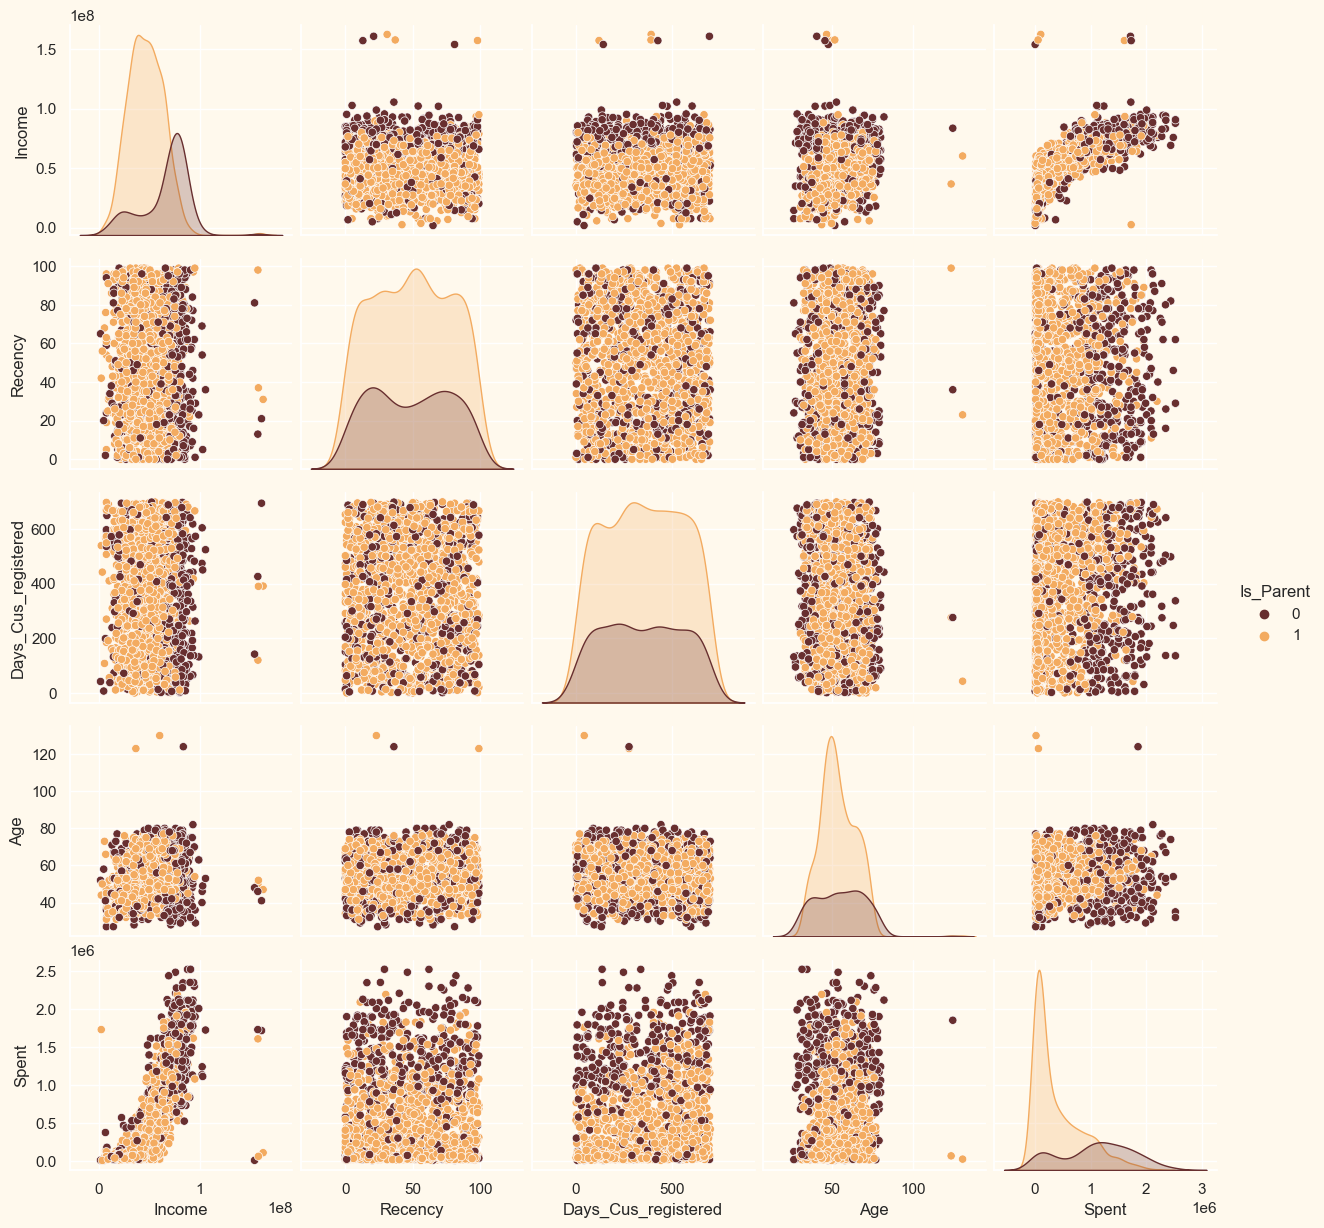

In [31]:
#to find any discrepancies having a broader view of the data
#for that ploting some of the selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Days_Cus_registered", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [32]:
#finding value of 1.5*1e8 in Income feature plot
print("value of 1.5*1e8=",1.5*1e8)

value of 1.5*1e8= 150000000.0


In [33]:
#maximum value of income column
data.Income.max()

162397000.0

In [34]:
#mean value of income column
data.Income.mean()

52005333.928571425

In [35]:
#maximum value of age column
data.Age.max()

130

In [36]:
#mean value of age column
data.Age.mean()

54.15238095238095

In [65]:
#creating a sample dataset df identical to 'data'
df=data
#displaying dataframe 'data'
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                 3         11         1                  663   66  1617000  \
1                 3         11         0                  113   69    27000   
2                 3         11         0                  312   58   776000   
3                 3         11         0                  139   39    53000   
4                 3         11         0                  161   42   422000   
...             ...        ...       ...                  ...  ...      ...   
1675              3         11         0                  578   32    82000   
1676              3         11         0                  461   48   244000   
1677              3         11         0                  367   44    36000   
1678              3         11         0                  502   47   404000   
1679              3         11         0                  157   43    71000   

      Children  Living_With  Family_Size  Is_Parent  
0            0        Alone            1          0  
1            2        Alone            3          1  
2            0      Partner            2          0  
3            1      Partner            3          1  
4            1      Partner            3          1  
...        ...          ...          ...        ...  
1675         0      Partner            2          0  
1676         1      Partner            3          1  
1677         1        Alone            2          1  
1678         1      Partner            3          1  
1679         1      Partner            3          1  

[1680 rows x 38 columns]

In [66]:
#Clearly, there are a few outliers in the Income and Age features. So deleting the outliers in the data.
#finding outliers in Income column and updating the dataframe
a=data['Income'].quantile(0.25)
b=data['Income'].quantile(0.75)
iqr = b - a
iqr_lower_bound = a - (1.5 * iqr)
iqr_upper_bound = b + (1.5 * iqr)
data=data[(data['Income']<iqr_upper_bound)&(data['Income']>iqr_lower_bound)]
#data is new data frame after removing outliers in Income feature
#df is the data frame which have outliers
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                 3         11         1                  663   66  1617000  \
1                 3         11         0                  113   69    27000   
2                 3         11         0                  312   58   776000   
3                 3         11         0                  139   39    53000   
4                 3         11         0                  161   42   422000   
...             ...        ...       ...                  ...  ...      ...   
1675              3         11         0                  578   32    82000   
1676              3         11         0                  461   48   244000   
1677              3         11         0                  367   44    36000   
1678              3         11         0                  502   47   404000   
1679              3         11         0                  157   43    71000   

      Children  Living_With  Family_Size  Is_Parent  
0            0        Alone            1          0  
1            2        Alone            3          1  
2            0      Partner            2          0  
3            1      Partner            3          1  
4            1      Partner            3          1  
...        ...          ...          ...        ...  
1675         0      Partner            2          0  
1676         1      Partner            3          1  
1677         1        Alone            2          1  
1678         1      Partner            3          1  
1679         1      Partner            3          1  

[1674 rows x 38 columns]

In [67]:
#finding outliers in Age column and updating the dataframe
c=data['Age'].quantile(0.25)
d=data['Age'].quantile(0.75)
iqr = d - c
iqr_lower_bound = c - (1.5 * iqr)
iqr_upper_bound = d + (1.5 * iqr)
data=data[(data['Age']<iqr_upper_bound)&(data['Age']>iqr_lower_bound)]
#data is new data frame after removing outliers in Age and Income feature
data

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                 3         11         1                  663   66  1617000  \
1                 3         11         0                  113   69    27000   
2                 3         11         0                  312   58   776000   
3                 3         11         0                  139   39    53000   
4                 3         11         0                  161   42   422000   
...             ...        ...       ...                  ...  ...      ...   
1675              3         11         0                  578   32    82000   
1676              3         11         0                  461   48   244000   
1677              3         11         0                  367   44    36000   
1678              3         11         0                  502   47   404000   
1679              3         11         0                  157   43    71000   

      Children  Living_With  Family_Size  Is_Parent  
0            0        Alone            1          0  
1            2        Alone            3          1  
2            0      Partner            2          0  
3            1      Partner            3          1  
4            1      Partner            3          1  
...        ...          ...          ...        ...  
1675         0      Partner            2          0  
1676         1      Partner            3          1  
1677         1        Alone            2          1  
1678         1      Partner            3          1  
1679         1      Partner            3          1  

[1671 rows x 38 columns]

In [ ]:
#9 rows carrying outlier values are removed

In [68]:
#now finding correlation amongst the features without considering categorical attributes
#creating a new sample dataframe for the same
dfN=data

In [69]:
#also creating a new dataframe to be used from data preprocessing part
data_N=data

In [70]:
#dropping categorical columns in sample dataframe 'dfcr' derived from 'dfN'
dfcr=dfN
dfcr = dfcr.drop(['Education', 'Marital_Status'], axis='columns')

In [71]:
#dropping more categorical columns
dfcr = dfcr.drop(['Living_With', 'Unnamed: 0.1','Unnamed: 0','Z_CostContact','Z_Revenue'], axis='columns')

In [46]:
#Z_CostContact and Z_Revenue columns are having constant numerical values, so they are not required in correlation

<Axes: >

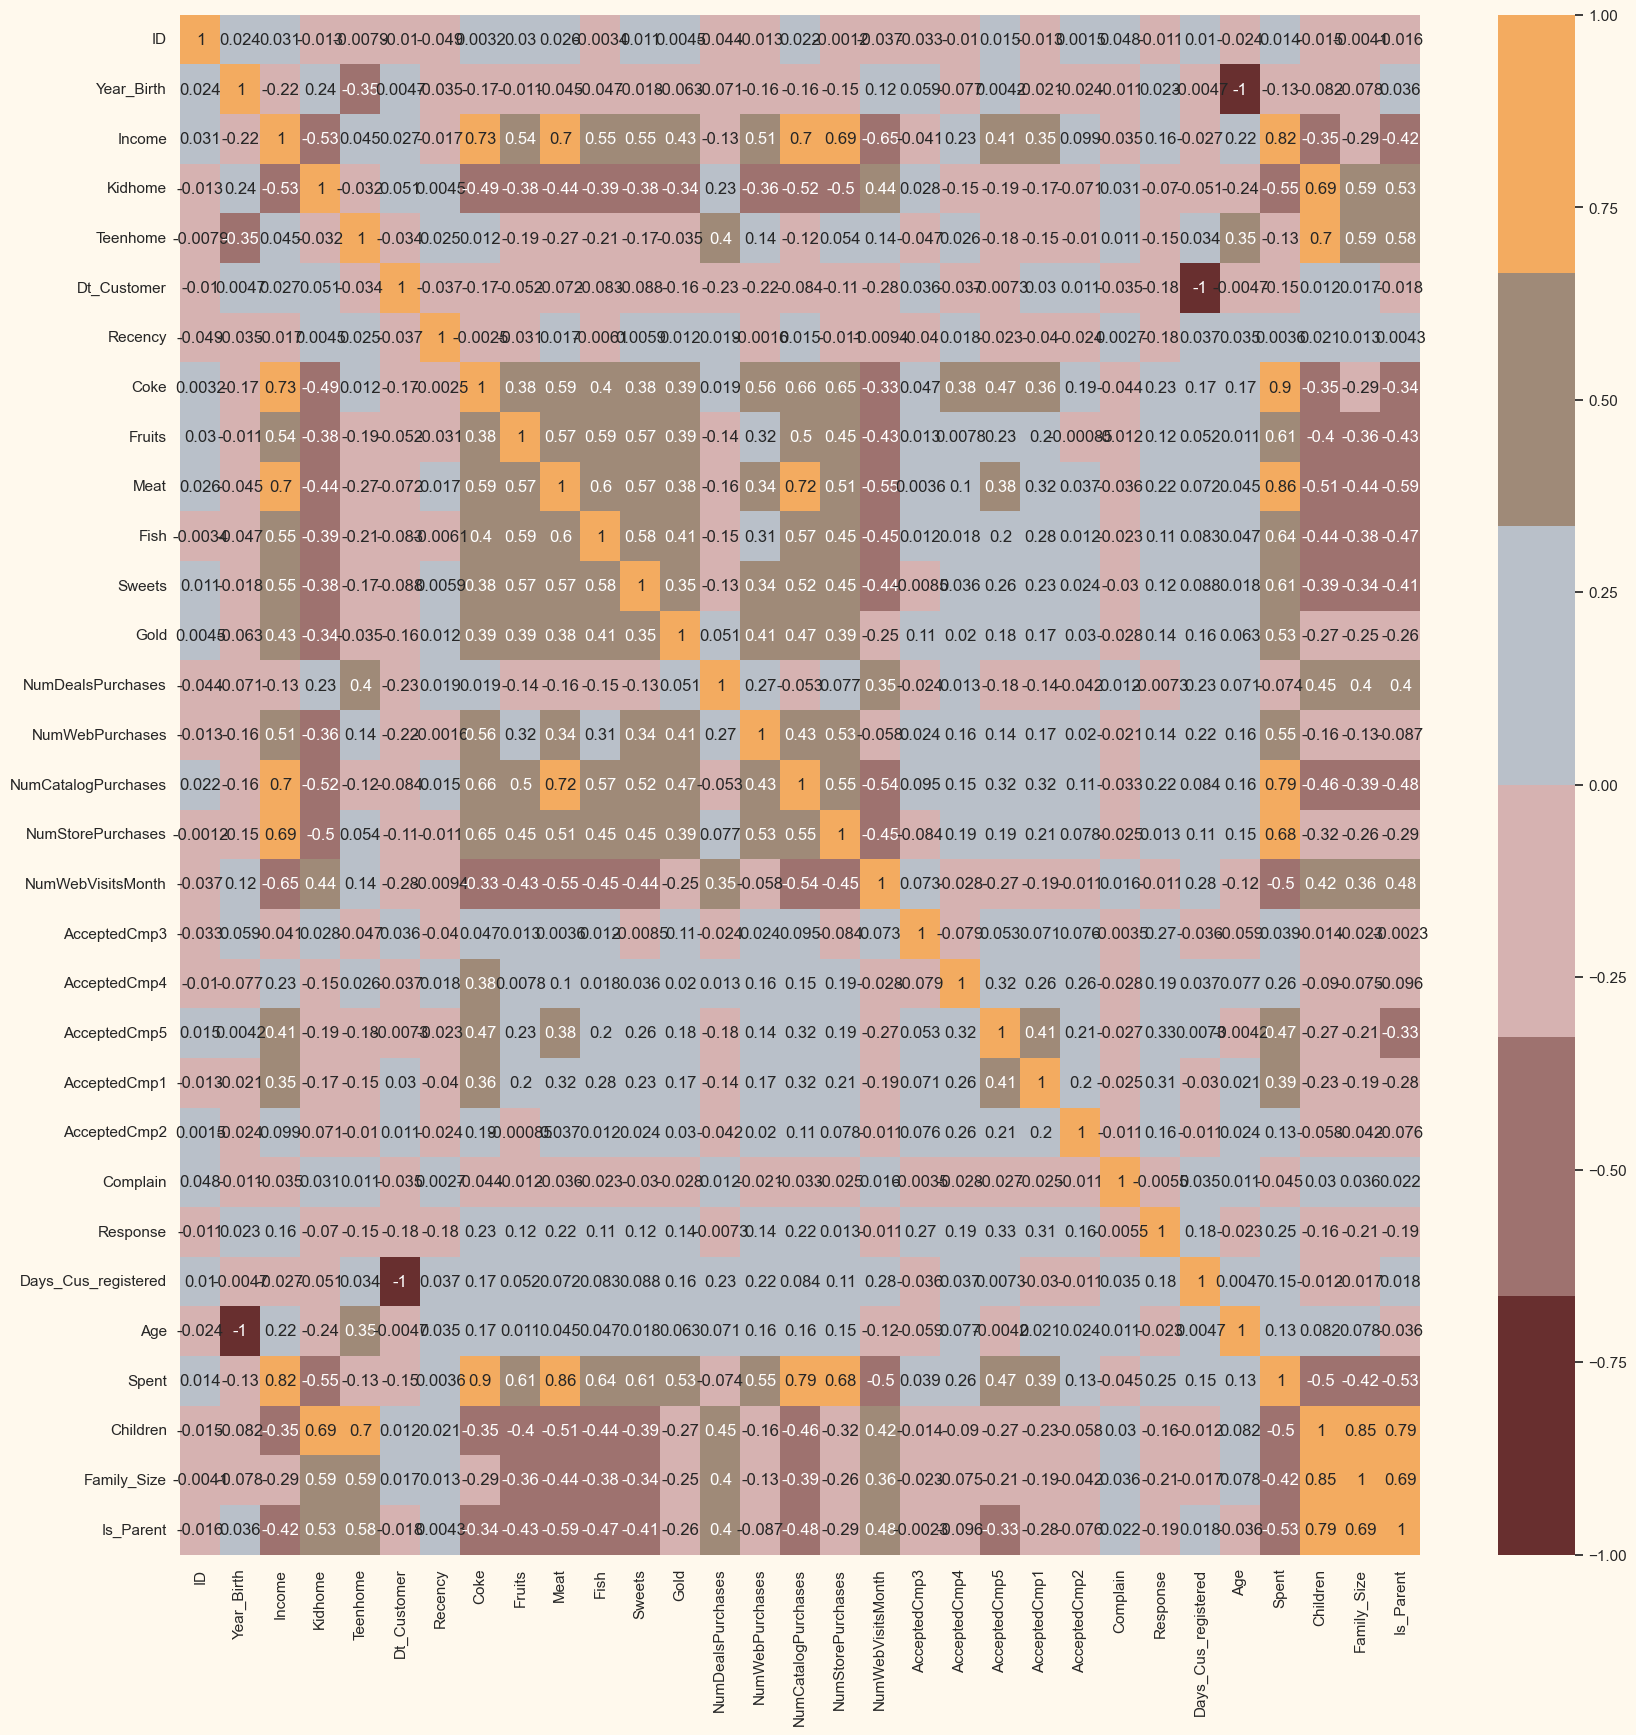

In [72]:
#correlation matrix
corrmat= dfcr.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
#dropping unwanted columns in test data
test = test.drop(["Unnamed: 0.1","Unnamed: 0"], axis='columns')

In [50]:
#dropping Marital_Status columns in test data
test = test.drop(['Marital_Status'], axis='columns')
test

ID  Year_Birth        Education      Income  Kidhome  Teenhome   
0     5939        1971        Graduated  38232000.0        1         1  \
1     2156        1955              PhD  22554000.0        1         1   
2     7788        1983              PhD  23536000.0        1         0   
3    10323        1952        Graduated  49413000.0        0         1   
4     7947        1969        Graduated  42231000.0        1         1   
..     ...         ...              ...         ...      ...       ...   
554  10870        1967        Graduated  61223000.0        0         1   
555   4001        1946              PhD  64014000.0        2         1   
556   7270        1981        Graduated  56981000.0        0         0   
557   8235        1956  Post-Graduation  69245000.0        0         1   
558   9405        1954              PhD  52869000.0        1         1   

    Dt_Customer  Recency    Coke  Fruits  ...  Z_CostContact  Z_Revenue   
0    2014-01-17       84   43000    5000  ...              3         11  \
1    2012-11-03       38   27000       0  ...              3         11   
2    2014-06-04       53    6000       0  ...              3         11   
3    2013-10-25       88  205000    7000  ...              3         11   
4    2014-03-25       99   24000       0  ...              3         11   
..          ...      ...     ...     ...  ...            ...        ...   
554  2013-06-13       46  709000   43000  ...              3         11   
555  2014-06-10       56  406000       0  ...              3         11   
556  2014-01-25       91  908000   48000  ...              3         11   
557  2014-01-24        8  428000   30000  ...              3         11   
558  2012-10-15       40   84000    3000  ...              3         11   

     Response  Days_Cus_registered  Age    Spent  Children  Living_With   
0           0                  162   52   122000         2      Partner  \
1           0                  602   68    41000         2      Partner   
2           0                   24   40    10000         1      Partner   
3           0                  246   71   304000         1      Partner   
4           0                   95   54    37000         2      Partner   
..        ...                  ...  ...      ...       ...          ...   
554         0                  380   56  1341000         1      Partner   
555         0                   18   77   444000         3      Partner   
556         0                  154   42  1241000         0        Alone   
557         0                  155   67   843000         1      Partner   
558         1                  621   69   172000         2      Partner   

     Family_Size  Is_Parent  
0              4          1  
1              4          1  
2              3          1  
3              3          1  
4              4          1  
..           ...        ...  
554            3          1  
555            5          1  
556            1          0  
557            3          1  
558            4          1  

[559 rows x 35 columns]

In [75]:
#reading train dataset
data_N

Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Education   
0                0           0  5524        1957      Graduated  \
1                1           1  2174        1954      Graduated   
2                2           2  4141        1965      Graduated   
3                3           3  6182        1984      Graduated   
4                4           4  5324        1981            PhD   
...            ...         ...   ...         ...            ...   
1675          1675        1675  4712        1991        Diploma   
1676          1676        1676  1170        1975      Graduated   
1677          1677        1677  6347        1979  Matriculation   
1678          1678        1678  4065        1976            PhD   
1679          1679        1679  8230        1980      Graduated   

     Marital_Status      Income  Kidhome  Teenhome Dt_Customer  ...   
0            Single  58138000.0        0         0  2012-09-04  ...  \
1            Single  46344000.0        1         1  2014-03-08  ...   
2           Engaged  71613000.0        0         0  2013-08-21  ...   
3           Engaged  26646000.0        1         0  2014-02-10  ...   
4           Married  58293000.0        1         0  2014-01-19  ...   
...             ...         ...      ...       ...         ...  ...   
1675        Engaged  20193000.0        0         0  2012-11-28  ...   
1676        Married  27573000.0        1         0  2013-03-25  ...   
1677         Single  15862000.0        1         0  2013-06-27  ...   
1678        Married  49544000.0        1         0  2013-02-12  ...   
1679        Married  33228000.0        1         0  2014-01-23  ...   

      Z_CostContact  Z_Revenue  Response  Days_Cus_registered  Age    Spent   
0                 3         11         1                  663   66  1617000  \
1                 3         11         0                  113   69    27000   
2                 3         11         0                  312   58   776000   
3                 3         11         0                  139   39    53000   
4                 3         11         0                  161   42   422000   
...             ...        ...       ...                  ...  ...      ...   
1675              3         11         0                  578   32    82000   
1676              3         11         0                  461   48   244000   
1677              3         11         0                  367   44    36000   
1678              3         11         0                  502   47   404000   
1679              3         11         0                  157   43    71000   

      Children  Living_With  Family_Size  Is_Parent  
0            0        Alone            1          0  
1            2        Alone            3          1  
2            0      Partner            2          0  
3            1      Partner            3          1  
4            1      Partner            3          1  
...        ...          ...          ...        ...  
1675         0      Partner            2          0  
1676         1      Partner            3          1  
1677         1        Alone            2          1  
1678         1      Partner            3          1  
1679         1      Partner            3          1  

[1671 rows x 38 columns]

In [76]:
#dropping Marital_Status, Unnamed: 0.1 and Unnamed: 0 columns in train data
data_N = data_N.drop(['Marital_Status','Unnamed: 0.1','Unnamed: 0'], axis='columns')
data_N

ID  Year_Birth      Education      Income  Kidhome  Teenhome   
0     5524        1957      Graduated  58138000.0        0         0  \
1     2174        1954      Graduated  46344000.0        1         1   
2     4141        1965      Graduated  71613000.0        0         0   
3     6182        1984      Graduated  26646000.0        1         0   
4     5324        1981            PhD  58293000.0        1         0   
...    ...         ...            ...         ...      ...       ...   
1675  4712        1991        Diploma  20193000.0        0         0   
1676  1170        1975      Graduated  27573000.0        1         0   
1677  6347        1979  Matriculation  15862000.0        1         0   
1678  4065        1976            PhD  49544000.0        1         0   
1679  8230        1980      Graduated  33228000.0        1         0   

     Dt_Customer  Recency    Coke  Fruits  ...  Z_CostContact  Z_Revenue   
0     2012-09-04       58  635000   88000  ...              3         11  \
1     2014-03-08       38   11000    1000  ...              3         11   
2     2013-08-21       26  426000   49000  ...              3         11   
3     2014-02-10       26   11000    4000  ...              3         11   
4     2014-01-19       94  173000   43000  ...              3         11   
...          ...      ...     ...     ...  ...            ...        ...   
1675  2012-11-28       18    8000    8000  ...              3         11   
1676  2013-03-25       45   50000   15000  ...              3         11   
1677  2013-06-27       26    1000    1000  ...              3         11   
1678  2013-02-12        0  308000       0  ...              3         11   
1679  2014-01-23       28   22000    2000  ...              3         11   

      Response  Days_Cus_registered  Age    Spent  Children  Living_With   
0            1                  663   66  1617000         0        Alone  \
1            0                  113   69    27000         2        Alone   
2            0                  312   58   776000         0      Partner   
3            0                  139   39    53000         1      Partner   
4            0                  161   42   422000         1      Partner   
...        ...                  ...  ...      ...       ...          ...   
1675         0                  578   32    82000         0      Partner   
1676         0                  461   48   244000         1      Partner   
1677         0                  367   44    36000         1        Alone   
1678         0                  502   47   404000         1      Partner   
1679         0                  157   43    71000         1      Partner   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
1675            2          0  
1676            3          1  
1677            2          1  
1678            3          1  
1679            3          1  

[1671 rows x 35 columns]

In [ ]:
#the data is clean, explored and new feature are included.
#now proceeding to the stage of data preprocessing

### Data preprocessing 

Preprocessing the data to perform clustering operations.

The steps to preprocess the data are:

1. Label encoding the categorical features
2. Scaling the features using the standard scaler
3. Creating a subset dataframe for dimensionality reduction

In [77]:
#finding categorical columns
s = (data_N.dtypes == 'object')
object_columns = list(s[s].index)

print("Categorical variables in the dataset:", object_columns)

Categorical variables in the dataset: ['Education', 'Living_With']


#### Label encoding 

In [78]:
L=LabelEncoder()
for i in object_columns:
    data_N[i]=data_N[[i]].apply(L.fit_transform)
    
print("Label encoding done and now all features are numerical")

Label encoding done and now all features are numerical


In [79]:
#finding categorical columns in test datset
s = (test.dtypes == 'object')
object_columns = list(s[s].index)

print("Categorical variables in the test dataset:", object_columns)

Categorical variables in the test dataset: ['Education', 'Living_With']


In [80]:
#label encoding test dataset
L=LabelEncoder()
for i in object_columns:
    test[i]=test[[i]].apply(L.fit_transform)
print("Label encoding done for test data and now all features are numerical")

Label encoding done for test data and now all features are numerical


#### Creating a subset of dataframe 

In [81]:
#creating a subset of dataframe by dropping the features on deals accepted and promotions
#for this again of copy of data is created
dc = data_N.copy()

In [82]:
cols_to_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
dc = dc.drop(cols_to_del, axis=1)

In [83]:
#similarly for test dataset
tc = test.copy()

In [84]:
#dropping columns for test data
tc = tc.drop(cols_to_del, axis=1)

#### Standard scaler 

In [85]:
scaler = StandardScaler()
scaler.fit(dc)
scaled_dc = pd.DataFrame(scaler.transform(dc),columns= dc.columns )
print("All columns are now scaled")

All columns are now scaled


In [86]:
#for test data
scaler = StandardScaler()
scaler.fit(tc)
scaled_tc = pd.DataFrame(scaler.transform(tc),columns= tc.columns )
print("All columns in test data are now scaled")

All columns in test data are now scaled


In [87]:
#now scaled train dataset can be used for dimensionality reduction
#reading scaled dataset
scaled_dc

ID  Year_Birth  Education    Income   Kidhome  Teenhome   Recency   
0    -0.009062   -1.025112  -0.657357  0.319491 -0.828124 -0.910479  0.308441  \
1    -1.043961   -1.282430  -0.657357 -0.257676  0.999876  0.907215 -0.383517   
2    -0.436305   -0.338932  -0.657357  0.978921 -0.828124 -0.910479 -0.798691   
3     0.194211    1.290745  -0.657357 -1.221644  0.999876 -0.910479 -0.798691   
4    -0.070847    1.033428   0.857737  0.327076  0.999876 -0.910479  1.553965   
...        ...         ...        ...       ...       ...       ...       ...   
1666 -0.259909    1.891153  -1.414904 -1.537436 -0.828124 -0.910479 -1.075475   
1667 -1.354122    0.518793  -0.657357 -1.176279  0.999876 -0.910479 -0.141332   
1668  0.245184    0.861883   0.100190 -1.749384  0.999876 -0.910479 -0.798691   
1669 -0.459784    0.604565   0.857737 -0.101077  0.999876 -0.910479 -1.698237   
1670  0.826890    0.947655  -0.657357 -0.899538  0.999876 -0.910479 -0.729496   

          Coke    Fruits      Meat  ...  NumWebVisitsMonth  Z_CostContact   
0     0.971240  1.571188  1.775866  ...           0.676149            0.0  \
1    -0.870621 -0.631970 -0.730304  ...          -0.144959            0.0   
2     0.354335  0.583566 -0.168736  ...          -0.555514            0.0   
3    -0.870621 -0.555999 -0.665329  ...           0.265595            0.0   
4    -0.392445  0.431624 -0.210506  ...          -0.144959            0.0   
...        ...       ...       ...  ...                ...            ...   
1666 -0.879476 -0.454704 -0.656047  ...          -0.555514            0.0   
1667 -0.755504 -0.277439 -0.247634  ...           1.086704            0.0   
1668 -0.900138 -0.631970 -0.739586  ...           1.086704            0.0   
1669  0.006034 -0.657294 -0.419353  ...           0.676149            0.0   
1670 -0.838152 -0.606646 -0.614277  ...           0.676149            0.0   

      Z_Revenue  Days_Cus_registered       Age     Spent  Children   
0           0.0             1.540560  1.025112  1.690637 -1.249807  \
1           0.0            -1.193161  1.282430 -0.960013  1.370553   
2           0.0            -0.204051  0.338932  0.288626 -1.249807   
3           0.0            -1.063931 -1.290745 -0.916669  0.060373   
4           0.0            -0.954582 -1.033428 -0.301518  0.060373   
...         ...                  ...       ...       ...       ...   
1666        0.0             1.118076 -1.891153 -0.868324 -1.249807   
1667        0.0             0.536539 -0.518793 -0.598258  0.060373   
1668        0.0             0.069321 -0.861883 -0.945009  0.060373   
1669        0.0             0.740325 -0.604565 -0.331525  0.060373   
1670        0.0            -0.974463 -0.947655 -0.886662  0.060373   

      Living_With  Family_Size  Is_Parent  
0       -1.355364    -1.746740  -1.572899  
1       -1.355364     0.434727   0.635769  
2        0.737809    -0.656007  -1.572899  
3        0.737809     0.434727   0.635769  
4        0.737809     0.434727   0.635769  
...           ...          ...        ...  
1666     0.737809    -0.656007  -1.572899  
1667     0.737809     0.434727   0.635769  
1668    -1.355364    -0.656007   0.635769  
1669     0.737809     0.434727   0.635769  
1670     0.737809     0.434727   0.635769  

[1671 rows x 27 columns]

### Dimensionality reduction

Performing dimensionality reduction on the selected features before putting them through a classifier.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA): is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

1. Dimensionality reduction with PCA
2. Plotting the reduced dataframe

Dimensionality reduction with PCA is done by reducing the 27 features in to dimensions of 3.

#### Dimensionality reduction with PCA 

In [88]:
#Initiating PCA 
pca = PCA(n_components=3)
pca.fit(scaled_dc)
PCA_dc = pd.DataFrame(pca.transform(scaled_dc), columns=(["col1","col2", "col3"]))
PCA_dc.describe().T

count          mean       std       min       25%       50%       75%   
col1  1671.0 -8.504401e-18  2.907475 -5.170028 -2.568948 -0.809015  2.446753  \
col2  1671.0  4.145896e-17  1.789467 -4.792284 -1.449986 -0.032932  1.328569   
col3  1671.0  4.677421e-17  1.396655 -4.218100 -0.959773  0.048731  0.985758   

           max  
col1  7.598718  
col2  6.277995  
col3  4.468666

In [ ]:
#col1, col2, and col3 represent the principal components resulting from a Principal Component Analysis (PCA) dimensionality -
#-reduction technique. In the context of data science and PCA, these columns represent new synthetic features that are linear -
#-combinations of the original features (variables) from the dataset.

#### Plotting the reduced dataframe 

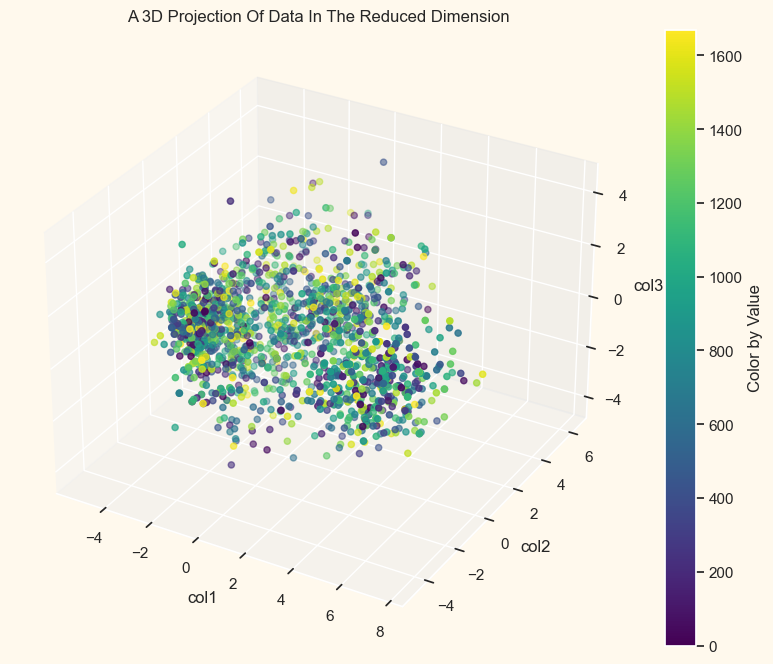

In [101]:
x = PCA_dc["col1"]
y = PCA_dc["col2"]
z = PCA_dc["col3"]

#Defining colors for each point based on col1, col2, and col3 values
colors = np.arange(len(x)) 

#plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=colors, cmap="viridis", marker="o")

#colour bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label("Color by Value")

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
ax.set_zlabel("col3")

plt.show()

In [90]:
#for test data
from sklearn.impute import SimpleImputer

#impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
scaled_tc_imputed = imputer.fit_transform(scaled_tc)

#Standardizing the data
scaler = StandardScaler()
scaled_tc = scaler.fit_transform(scaled_tc_imputed)

pca = PCA(n_components=3)
pca.fit(scaled_tc)
PCA_tc = pd.DataFrame(pca.transform(scaled_tc), columns=["col1", "col2", "col3"])
PCA_tc.describe().T

count          mean       std       min       25%       50%       75%   
col1  559.0 -8.897673e-17  2.804600 -5.955447 -2.441165 -0.647794  2.328147  \
col2  559.0 -2.224418e-17  1.771182 -4.278009 -1.453139  0.021562  1.362192   
col3  559.0  3.654401e-17  1.420920 -4.449047 -0.968476  0.044901  0.962764   

           max  
col1  6.873433  
col2  4.735807  
col3  5.735288

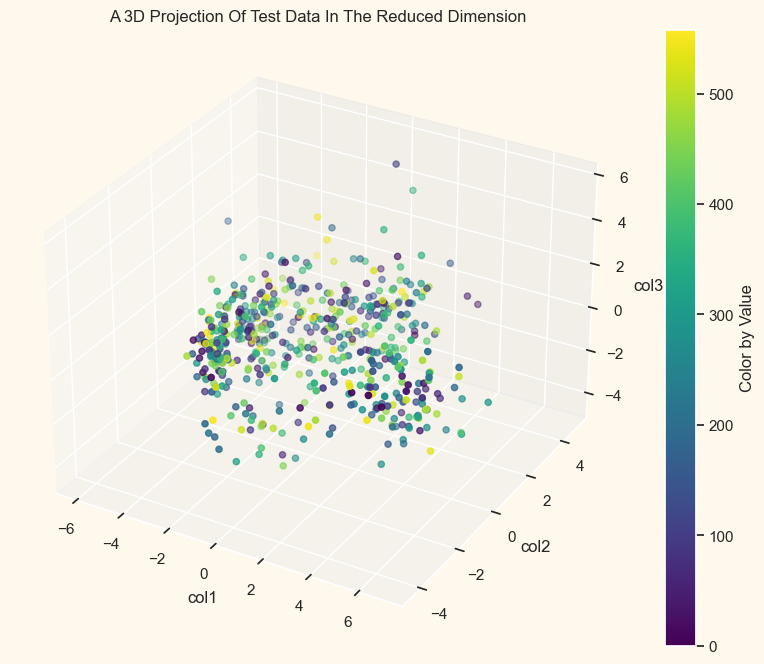

In [105]:
#Creating 3D Projection Of Test Data In The Reduced Dimension
x =PCA_tc["col1"]
y =PCA_tc["col2"]
z =PCA_tc["col3"]

#Defining colors for each point based on col1, col2, and col3 values
colors = np.arange(len(x)) 

#plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(x, y, z, c=colors, cmap="viridis", marker="o")

#colour bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label("Color by Value")

ax.set_title("A 3D Projection Of Test Data In The Reduced Dimension")
ax.set_xlabel("col1")
ax.set_ylabel("col2")
ax.set_zlabel("col3")
plt.show()

### Clustering 

After reducing the attributes to three dimensions, clustering is performed with Agglomerative clustering. 
Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via Agglomerative Clustering
3. Examining the clusters formed via scatter plot

#### Elbow Method to determine the number of clusters to be formed 

In [93]:
#defining a range of values for k (number of clusters)
k_range = range(1, 11)

# Initializing an empty list to store the sum of squared distances (inertia) for each k
inertia = []

#Fit KMeans for each value of k and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_dc)
    inertia.append(kmeans.inertia_)

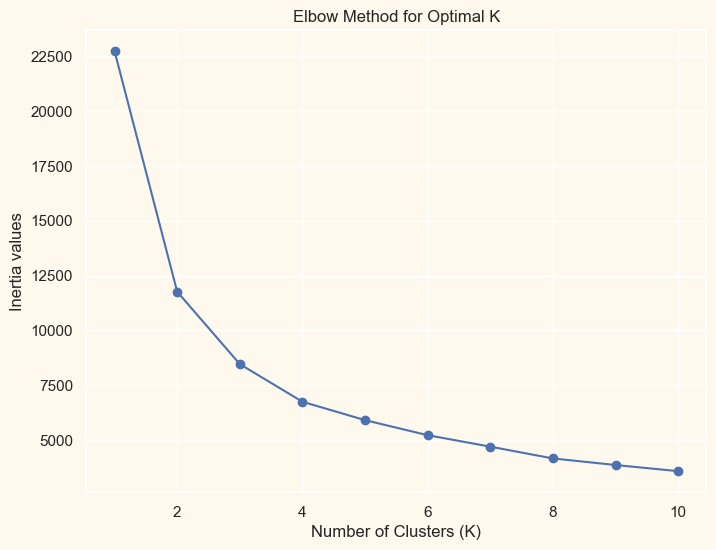

In [94]:
#Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia values')
plt.grid(True)
plt.show()

In [144]:
#the elbow point is when k = 4
#elbow point where the inertia starts to decrease at a slower rate. 
#which means 4 clusters can be considered or 4 will be an optimal number of clusters

In [106]:
# k=4
#training the model
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)

In [108]:
#Return a label for each data point based on their cluster
y=kmeans.fit_predict(PCA_dc)
print(y)

[1 3 1 ... 0 3 0]


In [109]:
#Visualizing the Clusters
x=PCA_dc.values

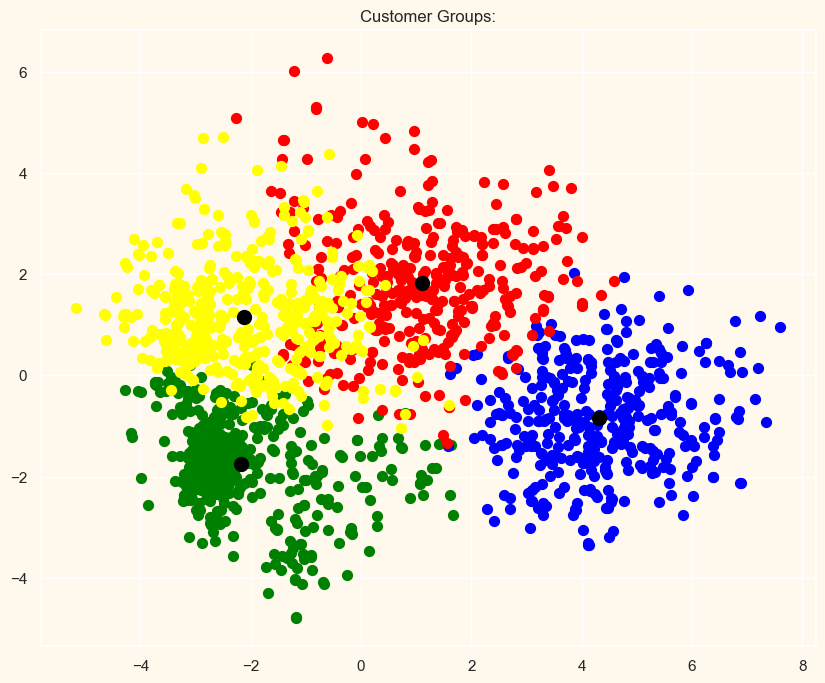

In [110]:
# plotting all the clustersand their centroids

plt.figure(figsize=(10,8))

plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster-0')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='blue', label='Cluster-1')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='red', label='Cluster-2')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='Cluster-3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='black', label='Centroid')

plt.title('Customer Groups:')
plt.show()

In [ ]:
#The centroids of each cluster are shown in the graph. There is a clear line of separation between each clustering group.

#### Clustering via Agglomerative Clustering 

In [113]:
#Initiating the Agglomerative Clustering model with k = 4
AC = AgglomerativeClustering(n_clusters=4)
#model and predicting clusters
yhat_AC = AC.fit_predict(PCA_dc)
PCA_dc["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data_N["Clusters"]= yhat_AC

In [114]:
#counting clusters
data_N['Clusters'].value_counts()

Clusters
0    533
1    439
3    360
2    339
Name: count, dtype: int64

In [115]:
test_AC = AC.fit_predict(PCA_tc)
PCA_tc["Clusters"] = test_AC
test["Clusters"]= test_AC

In [116]:
#counting clusters
test['Clusters'].value_counts()

Clusters
0    173
1    141
3    128
2    117
Name: count, dtype: int64

In [112]:
#cluster profiles
from sklearn.datasets import make_blobs

n_clusters = 4  # Number of clusters
AC = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = AC.fit_predict(PCA_dc)

PCA_dc["Clusters"] = cluster_labels
data_N["Clusters"] = cluster_labels

#Calculating cluster-level statistics
cluster_profiles = PCA_dc.groupby("Clusters").agg(["mean", "std"]).reset_index()

#Printing the cluster profiles (mean and standard deviation)
print(cluster_profiles)

  Clusters      col1                col2                col3          
                mean       std      mean       std      mean       std
0        0 -2.181072  1.231882 -1.581580  1.038681  0.132248  1.196028
1        1 -1.945021  1.183676  1.440441  1.204761 -0.517234  1.392800
2        2  1.324576  1.327362  1.547213  1.135818  0.863426  1.194303
3        3  4.353735  1.163255 -0.871880  1.018806 -0.378122  1.429699


#### Examining the clusters formed via scatter plot 

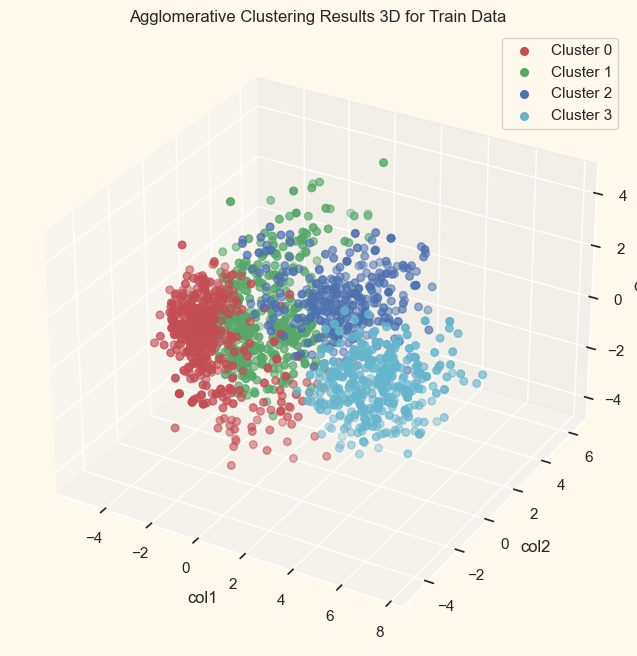

In [117]:
#for train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c'] 

for cluster_label in range(4): 
    cluster_data = PCA_dc[PCA_dc['Clusters'] == cluster_label]
    ax.scatter(cluster_data['col1'], cluster_data['col2'], cluster_data['col3'], c=colors[cluster_label], label=f'Cluster {cluster_label}', s=30)

ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
ax.set_title('Agglomerative Clustering Results 3D for Train Data')

ax.legend()
plt.show()

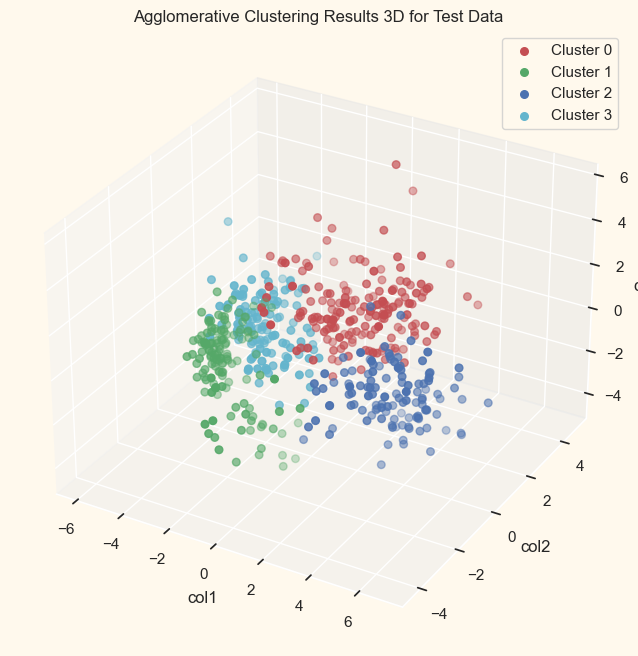

In [118]:
#for test data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c'] 

for cluster_label in range(4): 
    cluster_data = PCA_tc[PCA_tc['Clusters'] == cluster_label]
    ax.scatter(cluster_data['col1'], cluster_data['col2'], cluster_data['col3'], c=colors[cluster_label], label=f'Cluster {cluster_label}', s=30)

ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
ax.set_title('Agglomerative Clustering Results 3D for Test Data')

ax.legend()
plt.show()

### Evaluting models 

This is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

Text(0.5, 1.0, 'Distribution Of The Clusters for train data')

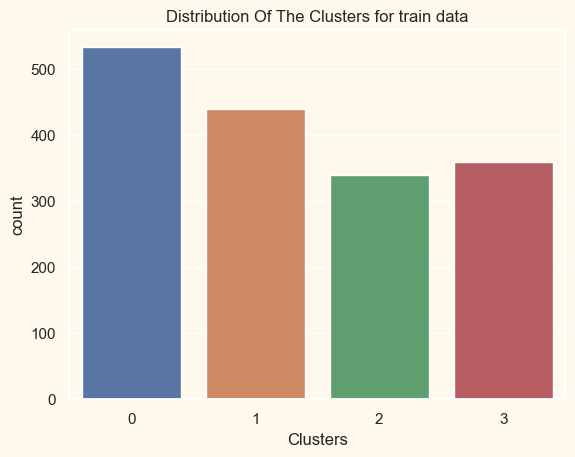

In [119]:
#Plotting countplot of clusters
pl = sns.countplot(x=data_N["Clusters"])
pl.set_title("Distribution Of The Clusters for train data")

In [121]:
#Most of the customers are in cluster 0 and the cluster 2 contains the least number of customers.
#So more focus should be done on cluster 0 considering count

Text(0.5, 1.0, 'Distribution Of The Clusters for test data')

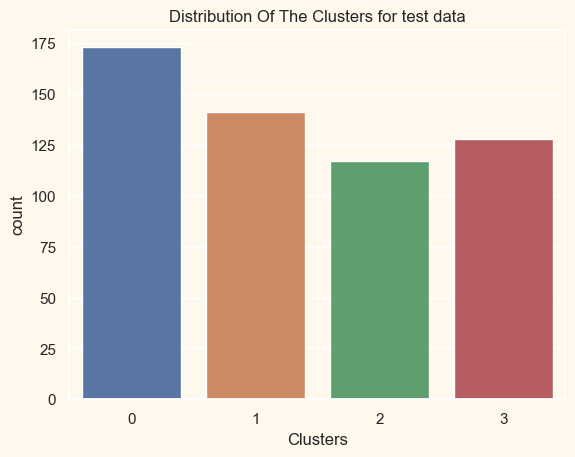

In [124]:
pl2 = sns.countplot(x=test["Clusters"])
pl2.set_title("Distribution Of The Clusters for test data")

In [163]:
#the clusters seem to be fairly distributed

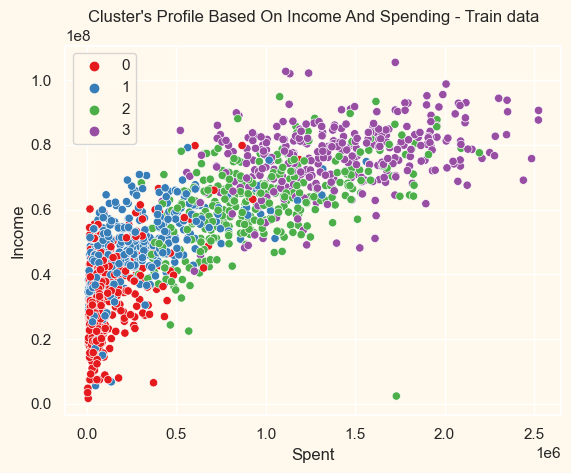

In [123]:
#scatter plot
custom_palette = sns.color_palette("Set1") 

pl = sns.scatterplot(data=data_N, x=data_N["Spent"], y=data_N["Income"], hue=data_N["Clusters"], palette=custom_palette)
pl.set_title("Cluster's Profile Based On Income And Spending - Train data")
plt.legend()
plt.show()

In [ ]:
#Income vs spending plot shows the clusters pattern
#cluster 0: low spending & low income 
#cluster 1: low spending & average income
#cluster 2: average spending & high income
#cluster 3: high spending & high income

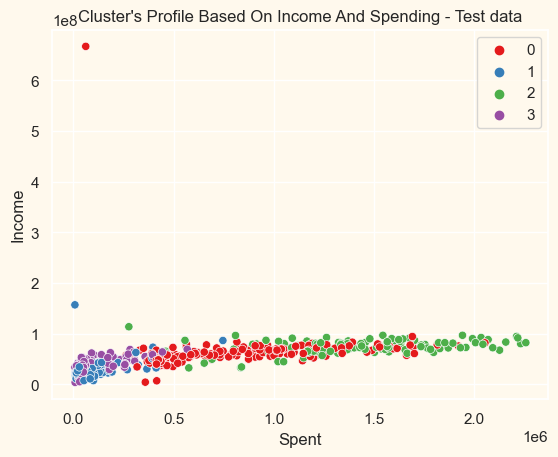

In [177]:
#scatter plot - test data
custom_palette = sns.color_palette("Set1")  

pl = sns.scatterplot(data=test, x=test["Spent"], y=test["Income"], hue=test["Clusters"], palette=custom_palette)
pl.set_title("Cluster's Profile Based On Income And Spending - Test data")
plt.legend()
plt.show()

In [ ]:
#Next looking at the detailed distribution of clusters as per the various products in the data. 
#Namely: Coke, Fruits, Meat, Fish, Sweets and Gold

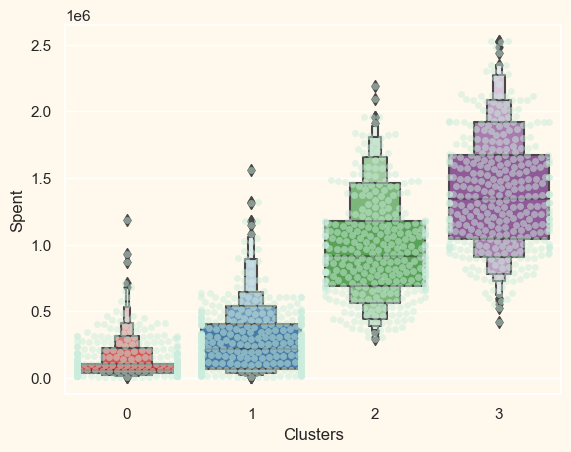

In [179]:
custom_palette = sns.color_palette("Set1")  # You can replace "Set1" with other palette names
plt.figure()
pl = sns.swarmplot(x=data_N["Clusters"], y=data_N["Spent"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=data_N["Clusters"], y=data_N["Spent"], palette=custom_palette)
plt.show()

In [180]:
#From the above plot, it can be clearly seen that cluster 3 is our biggest set of customers closely followed by cluster 2. 
#Low spending by cluster 0

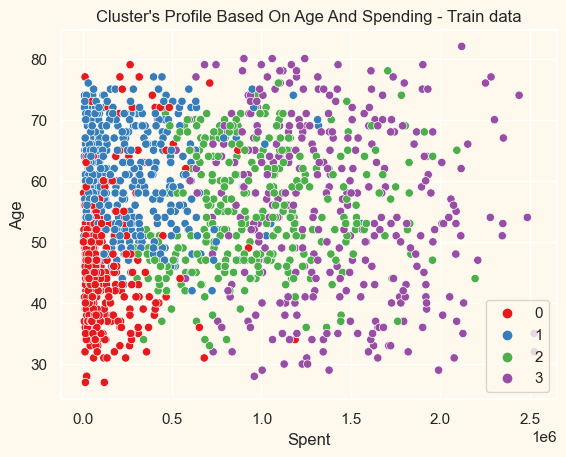

In [181]:
#scatter plot Age v/s Spent
custom_palette = sns.color_palette("Set1") 

pl = sns.scatterplot(data=data_N, x=data_N["Spent"], y=data_N["Age"], hue=data_N["Clusters"], palette=custom_palette)
pl.set_title("Cluster's Profile Based On Age And Spending - Train data")
plt.legend()
plt.show()

In [125]:
#Age vs spending plot shows the clusters pattern
#cluster 0: low spending 
#cluster 1: low spending
#cluster 2: average spending 
#cluster 3: high spending 
#cluster 2 and 3 should be focused as they have more purchasing power based on spending

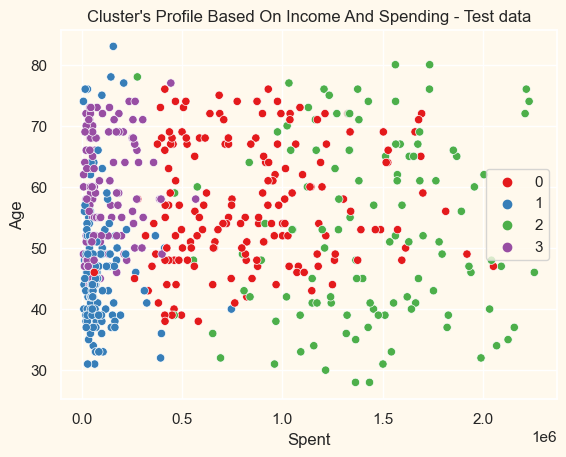

In [182]:
#scatter plot Age v/s Spent - test data
custom_palette = sns.color_palette("Set1")  

pl = sns.scatterplot(data=test, x=test["Spent"], y=test["Age"], hue=test["Clusters"], palette=custom_palette)
pl.set_title("Cluster's Profile Based On Age And Spending - Test data")
plt.legend()
plt.show()

In [126]:
#next exploring how did the campaigns do in the past.

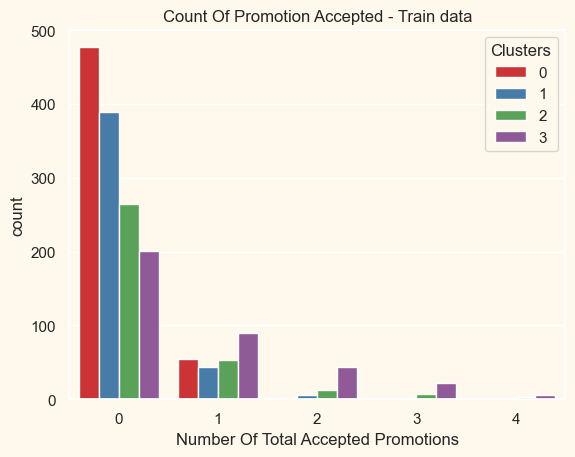

In [186]:
custom_palette = sns.color_palette("Set1")  

data_N["Total_Promos"] = data_N["AcceptedCmp1"] + data_N["AcceptedCmp2"] + data_N["AcceptedCmp3"] + data_N["AcceptedCmp4"] + data_N["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data_N["Total_Promos"], hue=data_N["Clusters"], palette=custom_palette)
pl.set_title("Count Of Promotion Accepted - Train data")
pl.set_xlabel("Number Of Total Accepted Promotions")

plt.show()

In [ ]:
#Findings: No overwhelming response to the campaigns so far. Very few participants are found. 
#Perhaps better-targeted and well-planned campaigns are required to boost sales.

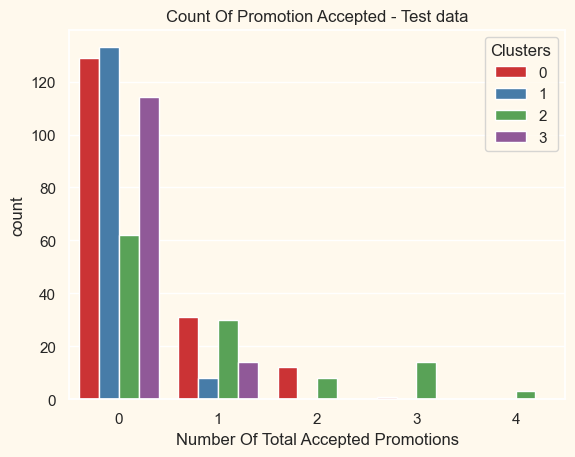

In [187]:
#test data
custom_palette = sns.color_palette("Set1")  

test["Total_Promos"] = test["AcceptedCmp1"] + test["AcceptedCmp2"] + test["AcceptedCmp3"] + test["AcceptedCmp4"] + test["AcceptedCmp5"]

# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=test["Total_Promos"], hue=test["Clusters"], palette=custom_palette)
pl.set_title("Count Of Promotion Accepted - Test data")
pl.set_xlabel("Number Of Total Accepted Promotions")

plt.show()

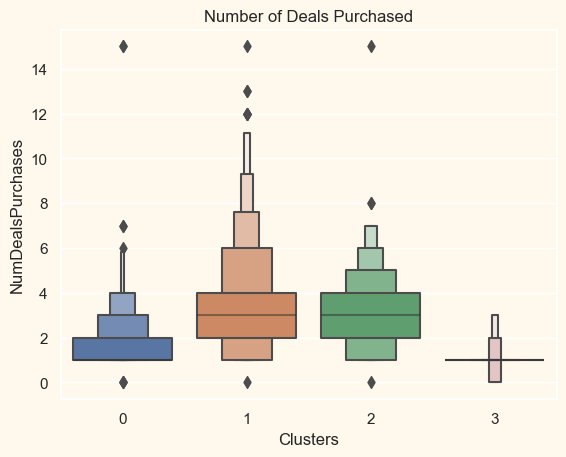

In [127]:
#next plotting the number of deals purchased

plt.figure()
sns.boxenplot(x=data_N["Clusters"],y=data_N["NumDealsPurchases"])
plt.title("Number of Deals Purchased")
plt.show()

In [ ]:
#It can be assumed that special offers or deals are effective than promotions
#They had the best deals with cluster 1 and cluster 2 of customers. But most important customers in cluster 3(high spent)-
#didn't show much interest in the deals.

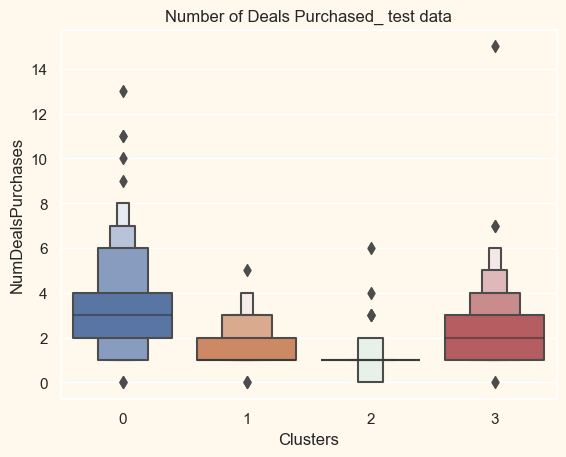

In [129]:
#next plotting the number of deals purchased based on test data

plt.figure()
sns.boxenplot(x=test["Clusters"],y=test["NumDealsPurchases"])
plt.title("Number of Deals Purchased_ test data")
plt.show()

### Profiling 

Plotting some of the features to see who all are there in these clusters. For that, profiling the clusters formed and trying to reach a conclusion about who are star customer and who needs more attention from the retail store's marketing team.

In [192]:
#using train dataset

<Figure size 640x480 with 0 Axes>

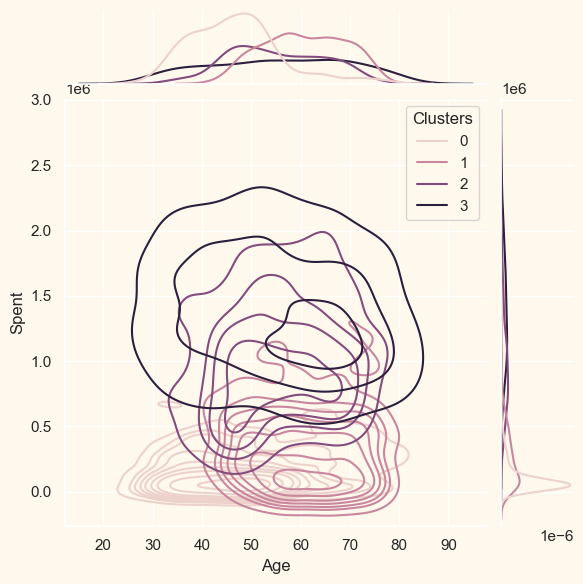

<Figure size 640x480 with 0 Axes>

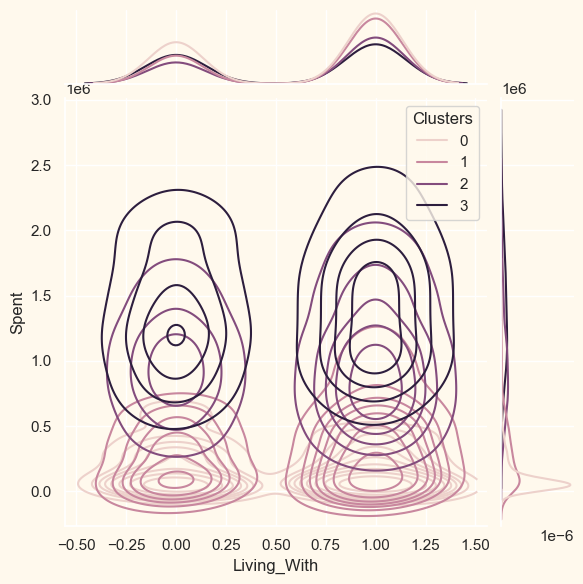

<Figure size 640x480 with 0 Axes>

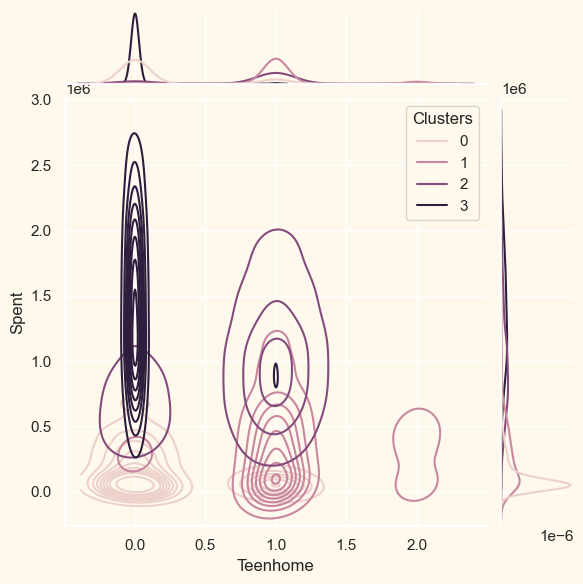

<Figure size 640x480 with 0 Axes>

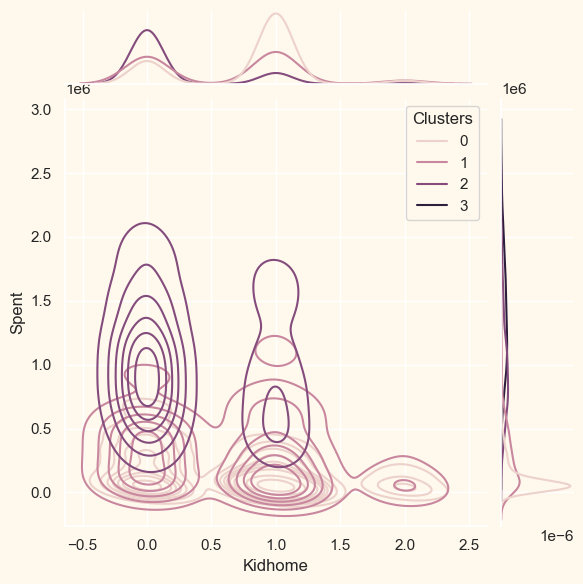

<Figure size 640x480 with 0 Axes>

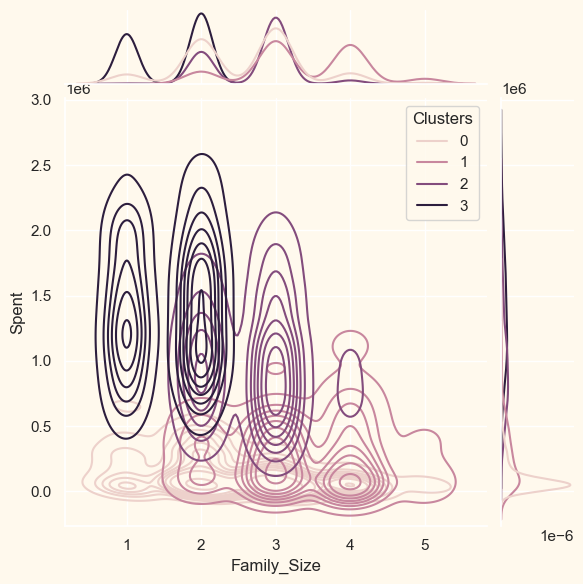

<Figure size 640x480 with 0 Axes>

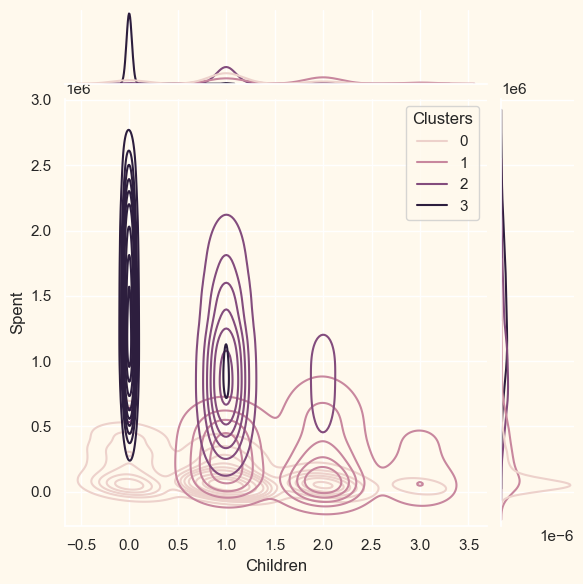

<Figure size 640x480 with 0 Axes>

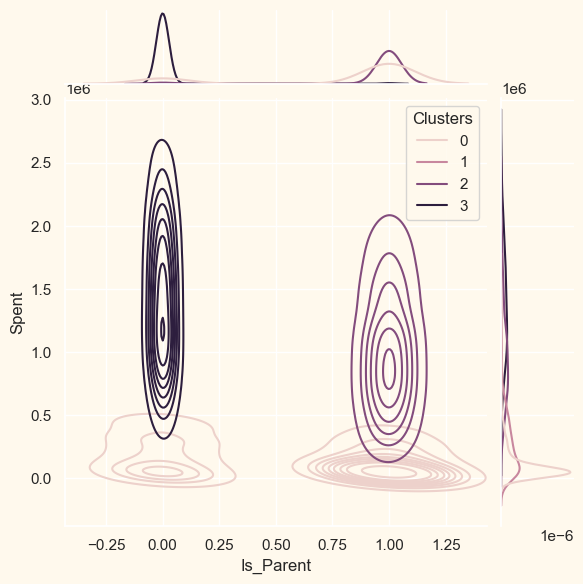

<Figure size 640x480 with 0 Axes>

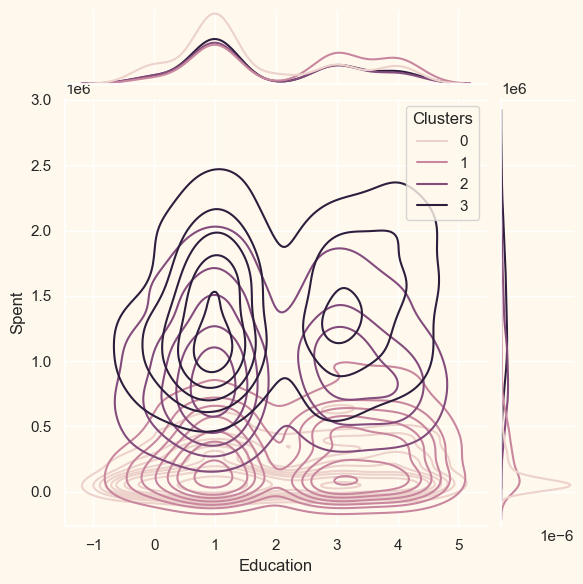

In [128]:
Features = ["Age", "Living_With", "Teenhome", "Kidhome", "Family_Size", "Children", "Is_Parent", "Education"]

for i in Features:
    plt.figure()
    sns.jointplot(x=data_N[i], y=data_N["Spent"], hue =data_N["Clusters"], kind="kde")
    plt.show()

#### Findings:

Cluster 0:
Comprising individuals aged between  20 and 80, this segment exhibits low or moderate spending habits. Predominantly composed of non-parents with family size of maximum five people having atlest one child or teenager will be in this cluster.Education status indicates theymay not be graduates.

Cluster 1:
Encompassing a age range from 40 to 80, this cluster exhibits low or moderate spending patterns. Predominantly composed of parents with family size of maximum five people having atlest one child or teenager will be in this cluster. Includes graduates and non graduates.

Cluster 2:
Spanning the age range of 35 to 75, this segment stands out for its average or decent spending tendencies. Family size of maximum four with one or two children or with one teenager. It comprises individuals from various marital status offering a diverse mix of consumer profiles.It includes mostly parents with diverse educational backgrounds.

Cluster 3:
Centered around ages 25 to 85, this cluster displays high spending behavior. It primarily consists of people who are not parents with no teenagers or with one child or no child in their households.Most of them are living alone or single. Family size maximum of two people. They have  diverse educational backgrounds.

### Conclusion

In this project, I conducted an unsupervised clustering analysis, integrating dimensionality reduction techniques followed by agglomerative clustering. The outcome yielded four distinct clusters, which were subsequently employed to create comprehensive customer profiles based on their unique family compositions and income/spending behaviors. This insightful segmentation can be instrumental in the strategic development of more effective and targeted marketing strategies. 

##### --The End-- 

##### --Thank You--